In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle
import datetime
import numpy as np
import random
import seaborn as sns

Specifying all the focal brands

In [2]:
focal_brands = ['Sephora',
 'ULTA Beauty',
 'Olive Garden',
 'The Cheesecake Factory',
 'Target',
 'Walmart',
 'Anthropologie',
 "Victoria's Secret"]

Reading the social brands catalog to get visits later for each store

In [3]:
brands_visits = pd.read_csv('../data/revision_visits_revenue_2019.csv')
brands_visits['brand_standard'] = brands_visits['brand'].apply(lambda x: x.strip().lower()) # For comparison with catalog.tsv
brands_visits['date'] = brands_visits['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())
brands_visits = brands_visits.rename(columns={'brand': 'brand_visitation'})
brands_visits.head()

,date,PLACEKEY,visits_by_day,spend_by_day,brand_visitation,lat,lon,brand_standard
0,2019-06-01,zzw-222@62j-sgj-q2k,5,0.0,Orangetheory Fitness,42.350592,-71.153024,orangetheory fitness
1,2019-06-02,zzw-222@62j-sgj-q2k,1,0.0,Orangetheory Fitness,42.350592,-71.153024,orangetheory fitness
2,2019-06-03,zzw-222@62j-sgj-q2k,6,859.0,Orangetheory Fitness,42.350592,-71.153024,orangetheory fitness
3,2019-06-04,zzw-222@62j-sgj-q2k,6,30.0,Orangetheory Fitness,42.350592,-71.153024,orangetheory fitness
4,2019-06-05,zzw-222@62j-sgj-q2k,8,193.0,Orangetheory Fitness,42.350592,-71.153024,orangetheory fitness


Reading Travel Time

In [4]:
with open('../data/travel_time.pkl', 'rb') as file:
    travel_time_dict = pickle.load(file)
    
travel_time_keys = list(travel_time_dict.keys())
from_keys = [key[0] for key in travel_time_keys]
to_keys = [key[1] for key in travel_time_keys]
time_minutes = list(travel_time_dict.values())
time_minutes = [int(time_inst.split(' ')[0]) for time_inst in time_minutes]

travel_time = pd.DataFrame({'From_PLACEKEY': from_keys, 'To_PLACEKEY': to_keys, 'Time_mins': time_minutes})
travel_time.head()

,From_PLACEKEY,To_PLACEKEY,Time_mins
0,zzw-224@62k-p96-s5z,zzw-223@62k-ns4-pn5,20
1,zzw-224@62k-p96-s5z,zzy-222@62k-pd8-975,20
2,zzw-224@62k-p96-s5z,237-222@62k-p8v-z4v,16
3,zzw-224@62k-p96-s5z,222-222@62k-p8v-2p9,12
4,zzw-224@62k-p96-s5z,229-222@62k-p76-d9z,14


Reading the statistics of the specific focal brand using the results of Part 2

In [5]:
brand = focal_brands[1]
focal_brand_path = os.path.join('../part2_r_statistics', brand)
focal_brand_path

'../part2_r_statistics/ULTA Beauty'

Reading all the neighboring brands results for the selected focal brand

In [6]:
file_list = os.listdir(focal_brand_path)
result_file_list = [file for file in file_list if file.find('_result') != -1]

In [7]:
result_df = pd.DataFrame()

for result_file in result_file_list:
    result_file_path = os.path.join(focal_brand_path, result_file)
    tmp_res_df = pd.read_csv(result_file_path, skiprows=1, float_precision="round_trip")
    # Removing all the records for ols and m_olsExp
    if 'filename' in tmp_res_df['filename'].tolist(): #Wrong input
        continue
    result_df = pd.concat([result_df, tmp_res_df], ignore_index=True)

In [8]:
result_df = result_df[~result_df['type'].isin(['ols', 'm_olsExp'])].reset_index(drop=True)
result_df = result_df.replace('FALSE', False).replace('False', False)
# result_df.iloc[:,3:] = result_df.iloc[:,3:].astype('float64', copy=True)

In [9]:
result_df

,tmp,filename,type,X_Estimate,X_Std. Error,X_t value,X_Pr(>|t|),IV_firststage_reviews_tw_Estimate,IV_firststage_reviews_tw_Std. Error,IV_firststage_reviews_tw_t value,...,HausWutest_Df,HausWutest_F,HausWutest_Pr(>F),Sargan_result_rsq,Sargan_result_adjrsq,Sargan_pvalue_rsq,Sargan_pvalue_adjrsq,num_sig_variables,Y_r.squared,Y_adj.r.squared
0,tmp,Brooks Brothers,fe_reviews_reviews,0.003056,0.007517,0.406562,0.684385,-0.00624079412931671,0.00747938753814673,-0.834399086487645,...,-1,1.37240786790343,0.241576591123235,1.00794655119,-372.914140392848,0.604125527535403,1,2,0.023716,-0.172287
1,tmp,Brooks Brothers,fe_reviews_visits,-0.010638,0.013340,-0.797458,0.425306,False,False,False,...,-1,0.00294557327576902,0.956724466360832,1.89072099633511e-29,-371.251588310038,1,1,1,0.051806,-0.138558
2,tmp,Brooks Brothers,fe_exp_reviews_reviews,0.058745,0.230411,0.254959,0.798788,-0.0692552336553319,0.0188052061705845,-3.68276917716873,...,-1,0.414683903654754,0.519695842826249,1.57369574766837,-372.236105096306,0.455277628385769,1,2,0.014096,-0.183839
3,tmp,Brooks Brothers,fe_exp_reviews_visits,0.008640,0.136860,0.063132,0.949670,False,False,False,...,-1,2.24234933826643,0.134478094272958,3.5233576724075e-29,-371.251588310038,1,1,1,0.030960,-0.163589
4,tmp,Torrid,fe_reviews_reviews,-0.024259,0.007729,-3.138542,0.001717,-0.0955795417935389,0.0824368326034767,-1.15942763416541,...,-1,2.21606896486891,0.136700414495612,1.64836292288027,-353.453259019918,0.438593851554528,1,1,0.077311,-0.034998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,tmp,REI,fe_exp_reviews_visits,-4.701012,6.422474,-0.731963,0.464305,False,False,False,...,-1,0.93771357990727,0.333021823284802,1.15940911595394e-28,-372.269484808455,1,1,0,0.001487,-0.206289
1532,tmp,B,fe_reviews_reviews,-1.168216,0.902370,-1.294608,0.195650,-0.00104722788448951,0.000244904872792523,-4.27605981272858,...,-1,1.15215601638022,0.283266654911609,0.00765832583988213,-375.321531429243,0.996178158975834,1,2,0.002796,-0.201310
1533,tmp,B,fe_reviews_visits,-0.946131,1.026615,-0.921603,0.356880,False,False,False,...,-1,0.988442247165039,0.320279789540618,1.74807109290467e-29,-372.44170984456,1,1,1,0.004459,-0.199306
1534,tmp,B,fe_exp_reviews_reviews,-11.748656,6.851270,-1.714814,0.086581,-0.00411588730859653,0.000864988782450084,-4.75831293087786,...,-1,2.72468633403165,0.099011699444586,0.48891852148984,-374.742895629804,0.783127891762443,1,2,0.000006,-0.204671


In [10]:
sum(result_df['filename'].value_counts() == 1)

0

In [11]:
sum(result_df['filename'].value_counts() == 2)

19

In [12]:
sum(result_df['filename'].value_counts() == 3)

2

In [13]:
sum(result_df['filename'].value_counts() == 4)

373

Only getting those brands who have values for all the four models

In [14]:
count_list = result_df['filename'].value_counts()
valid_brands = count_list[count_list == 4].index.to_list() # having the values of all the four models
len(valid_brands)

373

In [15]:
result_df = result_df[result_df['filename'].isin(valid_brands)]
result_df

,tmp,filename,type,X_Estimate,X_Std. Error,X_t value,X_Pr(>|t|),IV_firststage_reviews_tw_Estimate,IV_firststage_reviews_tw_Std. Error,IV_firststage_reviews_tw_t value,...,HausWutest_Df,HausWutest_F,HausWutest_Pr(>F),Sargan_result_rsq,Sargan_result_adjrsq,Sargan_pvalue_rsq,Sargan_pvalue_adjrsq,num_sig_variables,Y_r.squared,Y_adj.r.squared
0,tmp,Brooks Brothers,fe_reviews_reviews,0.003056,0.007517,0.406562,0.684385,-0.00624079412931671,0.00747938753814673,-0.834399086487645,...,-1,1.37240786790343,0.241576591123235,1.00794655119,-372.914140392848,0.604125527535403,1,2,0.023716,-0.172287
1,tmp,Brooks Brothers,fe_reviews_visits,-0.010638,0.013340,-0.797458,0.425306,False,False,False,...,-1,0.00294557327576902,0.956724466360832,1.89072099633511e-29,-371.251588310038,1,1,1,0.051806,-0.138558
2,tmp,Brooks Brothers,fe_exp_reviews_reviews,0.058745,0.230411,0.254959,0.798788,-0.0692552336553319,0.0188052061705845,-3.68276917716873,...,-1,0.414683903654754,0.519695842826249,1.57369574766837,-372.236105096306,0.455277628385769,1,2,0.014096,-0.183839
3,tmp,Brooks Brothers,fe_exp_reviews_visits,0.008640,0.136860,0.063132,0.949670,False,False,False,...,-1,2.24234933826643,0.134478094272958,3.5233576724075e-29,-371.251588310038,1,1,1,0.030960,-0.163589
4,tmp,Torrid,fe_reviews_reviews,-0.024259,0.007729,-3.138542,0.001717,-0.0955795417935389,0.0824368326034767,-1.15942763416541,...,-1,2.21606896486891,0.136700414495612,1.64836292288027,-353.453259019918,0.438593851554528,1,1,0.077311,-0.034998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,tmp,REI,fe_exp_reviews_visits,-4.701012,6.422474,-0.731963,0.464305,False,False,False,...,-1,0.93771357990727,0.333021823284802,1.15940911595394e-28,-372.269484808455,1,1,0,0.001487,-0.206289
1532,tmp,B,fe_reviews_reviews,-1.168216,0.902370,-1.294608,0.195650,-0.00104722788448951,0.000244904872792523,-4.27605981272858,...,-1,1.15215601638022,0.283266654911609,0.00765832583988213,-375.321531429243,0.996178158975834,1,2,0.002796,-0.201310
1533,tmp,B,fe_reviews_visits,-0.946131,1.026615,-0.921603,0.356880,False,False,False,...,-1,0.988442247165039,0.320279789540618,1.74807109290467e-29,-372.44170984456,1,1,1,0.004459,-0.199306
1534,tmp,B,fe_exp_reviews_reviews,-11.748656,6.851270,-1.714814,0.086581,-0.00411588730859653,0.000864988782450084,-4.75831293087786,...,-1,2.72468633403165,0.099011699444586,0.48891852148984,-374.742895629804,0.783127891762443,1,2,0.000006,-0.204671


Extract the significant neighboring brands whose p-values for all the models are significant (<0.05) i.e., X_Pr(>|t|)

In [19]:
def filter_brands_pvalue(brand_pvalue):
    pvalues = brand_pvalue.values
    
    if (pvalues[0] < 0.05) and (pvalues[1] < 0.05) and (pvalues[2] < 0.05) and (pvalues[3] < 0.05):
        return True
    else:
        return False

In [20]:
significant_brands = result_df.groupby('filename')['X_Pr(>|t|)'].apply(filter_brands_pvalue)
significant_brands_list = significant_brands [significant_brands == True].index.to_list()

In [21]:
significant_brands_list

['CarMax',
 'Charlotte Russe',
 "Dave & Buster's",
 "Denny's",
 'Everything but Water',
 'MOOYAH',
 "Not Your Average Joe's",
 'Pretzelmaker',
 'Wegmans Food Markets']

### Performing the calculations for WIC and WIBC

Firstly Calculating the Inverse and Inverse-Exp of the Time_mins

In [22]:
travel_time['Time_mins_inv'] = 1/travel_time['Time_mins']
travel_time['Time_mins_inv_exp'] = 1/np.exp(travel_time['Time_mins'])
travel_time = travel_time.rename(columns={'From_PLACEKEY': 'Focal_Stores', 'To_PLACEKEY': 'Neib_Stores'})
travel_time

,Focal_Stores,Neib_Stores,Time_mins,Time_mins_inv,Time_mins_inv_exp
0,zzw-224@62k-p96-s5z,zzw-223@62k-ns4-pn5,20,0.050000,2.061154e-09
1,zzw-224@62k-p96-s5z,zzy-222@62k-pd8-975,20,0.050000,2.061154e-09
2,zzw-224@62k-p96-s5z,237-222@62k-p8v-z4v,16,0.062500,1.125352e-07
3,zzw-224@62k-p96-s5z,222-222@62k-p8v-2p9,12,0.083333,6.144212e-06
4,zzw-224@62k-p96-s5z,229-222@62k-p76-d9z,14,0.071429,8.315287e-07
...,...,...,...,...,...
139637,zzy-22f@62j-shz-vs5,22c-222@62j-sgs-w49,29,0.034483,2.543666e-13
139638,zzy-22f@62j-shz-vs5,22k-222@62j-sjr-z9f,21,0.047619,7.582560e-10
139639,zzy-22f@62j-shz-vs5,228-222@62j-sj3-v75,14,0.071429,8.315287e-07
139640,zzy-22f@62j-shz-vs5,22g-222@62j-sxw-33q,19,0.052632,5.602796e-09


1. Extracting all the stores of the significant brands and focal store
2. Calculating the Average Visits of each store to be used as average sales
3. Dropping all the duplicate rows to have a clean dataframe

In [23]:
brands_visits_focal_sig_neib = brands_visits[(brands_visits['brand_visitation'].isin(significant_brands_list)) | (brands_visits['brand_visitation']==brand)]
brands_visits_focal_sig_neib.loc[:,'avg_visits'] = brands_visits_focal_sig_neib.groupby('PLACEKEY')['visits_by_day'].transform('mean')
brands_visits_focal_sig_neib = brands_visits_focal_sig_neib.drop(columns=['date', 'visits_by_day', 'spend_by_day'])
brands_visits_focal_sig_neib = brands_visits_focal_sig_neib.drop_duplicates().reset_index(drop=True)
brands_visits_focal_sig_neib

/tmp/ipykernel_756696/4234074472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brands_visits_focal_sig_neib.loc[:,'avg_visits'] = brands_visits_focal_sig_neib.groupby('PLACEKEY')['visits_by_day'].transform('mean')


,PLACEKEY,brand_visitation,lat,lon,brand_standard,avg_visits
0,zzw-223@62j-pth-zs5,ULTA Beauty,42.541407,-70.944611,ulta beauty,602.186813
1,zzy-222@62k-r84-q9f,MOOYAH,42.393184,-71.598693,mooyah,7.634615
2,zzw-222@62k-qrk-xt9,MOOYAH,42.284985,-71.671352,mooyah,2.208791
3,222-222@62j-ptf-xkf,CarMax,42.559625,-70.971322,carmax,46.862637
4,222-222@62j-srm-vmk,Dave & Buster's,42.300860,-71.381633,dave & buster's,846.741784
...,...,...,...,...,...,...
57,zzw-222@62k-2kp-q9f,ULTA Beauty,41.776085,-70.745441,ulta beauty,24.148760
58,222-222@62k-3q6-s5z,Not Your Average Joe's,41.668636,-70.297948,not your average joe's,21.087912
59,223-222@62k-rf2-9pv,Denny's,42.294950,-71.775411,denny's,10.133333
60,zzw-225@62k-qps-vmk,ULTA Beauty,42.196661,-71.779316,ulta beauty,2.776316


Extracting the time_mins with all the focal stores belonging to brand under consideration, and all of the significant brands

In [24]:
focal_stores = brands_visits_focal_sig_neib[brands_visits_focal_sig_neib['brand_visitation'] == brand]['PLACEKEY'].unique().tolist()
sig_neib_stores = brands_visits_focal_sig_neib[brands_visits_focal_sig_neib['brand_visitation'].isin(significant_brands_list)]['PLACEKEY'].unique().tolist()
travel_time_filtered = travel_time[(travel_time['Focal_Stores'].isin(focal_stores)) & (travel_time['Neib_Stores'].isin(sig_neib_stores))]
travel_time_filtered

,Focal_Stores,Neib_Stores,Time_mins,Time_mins_inv,Time_mins_inv_exp
2457,223-222@62k-rgg-7qz,zzy-222@62k-r84-q9f,19,0.052632,5.602796e-09
2463,223-222@62k-rgg-7qz,zzw-222@62k-qrk-xt9,4,0.250000,1.831564e-02
2576,223-222@62k-rgg-7qz,zzw-222@62k-rgg-gx5,2,0.500000,1.353353e-01
2889,223-222@62k-rgg-7qz,222-222@62k-r6q-b6k,9,0.111111,1.234098e-04
3027,223-222@62k-rgg-7qz,223-222@62k-rf2-9pv,18,0.055556,1.522998e-08
...,...,...,...,...,...
129771,zzw-227@62k-3q6-qvf,222-222@62k-3q6-s5z,3,0.333333,4.978707e-02
137292,zzw-225@62k-qps-vmk,zzw-222@62k-qrk-xt9,22,0.045455,2.789468e-10
137368,zzw-225@62k-qps-vmk,zzw-222@62k-rgg-gx5,23,0.043478,1.026188e-10
137699,zzw-225@62k-qps-vmk,zzw-226@62k-qz3-9zz,12,0.083333,6.144212e-06


Merging by Focal Stores to get the average visits of the focal stores

In [25]:
travel_time_filtered = pd.merge(left=travel_time_filtered, right=brands_visits_focal_sig_neib, how='left', left_on='Focal_Stores', right_on='PLACEKEY')
travel_time_filtered = travel_time_filtered.drop(columns=['PLACEKEY', 'brand_standard']).rename(columns={'brand_visitation':'Foc_Brand', 'lat':'Foc_lat', 'lon':'Foc_lon', 'avg_visits': 'Foc_avg_visits'})
travel_time_filtered

,Focal_Stores,Neib_Stores,Time_mins,Time_mins_inv,Time_mins_inv_exp,Foc_Brand,Foc_lat,Foc_lon,Foc_avg_visits
0,223-222@62k-rgg-7qz,zzy-222@62k-r84-q9f,19,0.052632,5.602796e-09,ULTA Beauty,42.293301,-71.672084,7.706044
1,223-222@62k-rgg-7qz,zzw-222@62k-qrk-xt9,4,0.250000,1.831564e-02,ULTA Beauty,42.293301,-71.672084,7.706044
2,223-222@62k-rgg-7qz,zzw-222@62k-rgg-gx5,2,0.500000,1.353353e-01,ULTA Beauty,42.293301,-71.672084,7.706044
3,223-222@62k-rgg-7qz,222-222@62k-r6q-b6k,9,0.111111,1.234098e-04,ULTA Beauty,42.293301,-71.672084,7.706044
4,223-222@62k-rgg-7qz,223-222@62k-rf2-9pv,18,0.055556,1.522998e-08,ULTA Beauty,42.293301,-71.672084,7.706044
...,...,...,...,...,...,...,...,...,...
58,zzw-227@62k-3q6-qvf,222-222@62k-3q6-s5z,3,0.333333,4.978707e-02,ULTA Beauty,41.668977,-70.292988,20.884615
59,zzw-225@62k-qps-vmk,zzw-222@62k-qrk-xt9,22,0.045455,2.789468e-10,ULTA Beauty,42.196661,-71.779316,2.776316
60,zzw-225@62k-qps-vmk,zzw-222@62k-rgg-gx5,23,0.043478,1.026188e-10,ULTA Beauty,42.196661,-71.779316,2.776316
61,zzw-225@62k-qps-vmk,zzw-226@62k-qz3-9zz,12,0.083333,6.144212e-06,ULTA Beauty,42.196661,-71.779316,2.776316


Merging by Neighboring Stores to get the average visits of the neighboring stores

In [26]:
travel_time_filtered = pd.merge(left=travel_time_filtered, right=brands_visits_focal_sig_neib, how='left', left_on='Neib_Stores', right_on='PLACEKEY')
travel_time_filtered = travel_time_filtered.drop(columns=['PLACEKEY','lat', 'lon', 'brand_standard']).rename(columns={'brand_visitation':'Neib_Brand', 'avg_visits': 'Neib_avg_visits'})
travel_time_filtered

,Focal_Stores,Neib_Stores,Time_mins,Time_mins_inv,Time_mins_inv_exp,Foc_Brand,Foc_lat,Foc_lon,Foc_avg_visits,Neib_Brand,Neib_avg_visits
0,223-222@62k-rgg-7qz,zzy-222@62k-r84-q9f,19,0.052632,5.602796e-09,ULTA Beauty,42.293301,-71.672084,7.706044,MOOYAH,7.634615
1,223-222@62k-rgg-7qz,zzw-222@62k-qrk-xt9,4,0.250000,1.831564e-02,ULTA Beauty,42.293301,-71.672084,7.706044,MOOYAH,2.208791
2,223-222@62k-rgg-7qz,zzw-222@62k-rgg-gx5,2,0.500000,1.353353e-01,ULTA Beauty,42.293301,-71.672084,7.706044,Wegmans Food Markets,106.043956
3,223-222@62k-rgg-7qz,222-222@62k-r6q-b6k,9,0.111111,1.234098e-04,ULTA Beauty,42.293301,-71.672084,7.706044,CarMax,44.852853
4,223-222@62k-rgg-7qz,223-222@62k-rf2-9pv,18,0.055556,1.522998e-08,ULTA Beauty,42.293301,-71.672084,7.706044,Denny's,10.133333
...,...,...,...,...,...,...,...,...,...,...,...
58,zzw-227@62k-3q6-qvf,222-222@62k-3q6-s5z,3,0.333333,4.978707e-02,ULTA Beauty,41.668977,-70.292988,20.884615,Not Your Average Joe's,21.087912
59,zzw-225@62k-qps-vmk,zzw-222@62k-qrk-xt9,22,0.045455,2.789468e-10,ULTA Beauty,42.196661,-71.779316,2.776316,MOOYAH,2.208791
60,zzw-225@62k-qps-vmk,zzw-222@62k-rgg-gx5,23,0.043478,1.026188e-10,ULTA Beauty,42.196661,-71.779316,2.776316,Wegmans Food Markets,106.043956
61,zzw-225@62k-qps-vmk,zzw-226@62k-qz3-9zz,12,0.083333,6.144212e-06,ULTA Beauty,42.196661,-71.779316,2.776316,Charlotte Russe,78.483412


#### Performing Neib Centrality Calculations by taking each neighboring brand

In [27]:
def centrality_calc(group_df):
    neib_brand = group_df.name
    neib_result_df = result_df [result_df['filename'] == neib_brand]
    
    dist_l = group_df['Time_mins_inv'].values
    dist2_l = group_df['Time_mins_inv_exp'].values
    average_sales = group_df['Neib_avg_visits'].values
    est_reviews = neib_result_df[neib_result_df['type'] == 'fe_reviews_reviews']['X_Estimate'].values[0]
    est_reviews_exp = neib_result_df[neib_result_df['type'] == 'fe_exp_reviews_reviews']['X_Estimate'].values[0]

    weighted_influence = np.sum(np.array(dist_l).dot(np.array(average_sales))*float(est_reviews))
    weighted_influence_exp = np.sum(np.array(dist2_l).dot(np.array(average_sales))*float(est_reviews_exp))
    influence = np.sum(np.array(dist_l)*float(est_reviews))
    weighted_no_influence = np.sum(np.array(dist_l).dot(np.array(average_sales)))
    no_influence = np.sum(np.array(dist_l))
    avg_visits = np.mean(average_sales)
    dist_inv = np.mean([1.0 / d for d in np.array(dist_l)])
    num_stores = group_df['Neib_Stores'].nunique()
    
    return pd.Series({'weighted_influence': weighted_influence, 'weighted_influence_exp': weighted_influence_exp, 'influence': influence,
                      'weighted_no_influence': weighted_no_influence, 'no_influence': no_influence, 'avg_visits':avg_visits,
                      'dist_inv': dist_inv, 'num_stores': num_stores})

In [28]:
neib_centrality = travel_time_filtered.groupby('Neib_Brand')[['Time_mins_inv', 'Time_mins_inv_exp', 'Neib_avg_visits', 'Neib_Stores']].apply(centrality_calc).reset_index()
neib_centrality

,Neib_Brand,weighted_influence,weighted_influence_exp,influence,weighted_no_influence,no_influence,avg_visits,dist_inv,num_stores
0,CarMax,17.145562,0.446178,0.423818,17.937413,0.443391,38.836746,13.000000,3.0
1,Charlotte Russe,4.451005,0.532754,0.006693,487.662424,0.733333,674.311148,12.142857,4.0
2,Dave & Buster's,0.868496,0.050222,0.003239,137.130854,0.511421,178.239473,14.500000,3.0
3,Denny's,5.031817,0.583205,0.467219,7.598638,0.705556,11.027509,12.200000,4.0
4,Everything but Water,0.612728,0.110673,0.001666,131.840224,0.358537,200.550372,14.750000,3.0
5,MOOYAH,-1.212491,-7.980527,-0.209158,6.084839,1.049649,5.536058,16.125000,4.0
6,Not Your Average Joe's,11.009737,14.816050,0.090782,168.891364,1.392619,62.083104,15.916667,8.0
7,Pretzelmaker,12.379748,43.119752,0.074689,242.590883,1.463585,167.063187,8.750000,3.0
8,Wegmans Food Markets,1.460471,1.709935,0.007736,286.468576,1.517326,153.333562,17.333333,5.0


#### Performing Inner Centrality Calculations by taking each focal store

In [29]:
def inner_centrality_calc(group_df):
        
    dist_l = group_df['Time_mins_inv'].values
    dist2_l = group_df['Time_mins_inv_exp'].values
    average_sales = group_df['Neib_avg_visits'].values
    
    est_reviews = []
    est_exp_reviews = []
    neib_brand_list = group_df['Neib_Brand'].values.tolist()
    for neib_brand in neib_brand_list:
        neib_result_df = result_df[result_df['filename'] == neib_brand]
        est_reviews.append(neib_result_df[neib_result_df['type'] == 'fe_reviews_reviews']['X_Estimate'].values[0])
        est_exp_reviews.append(neib_result_df[neib_result_df['type'] == 'fe_exp_reviews_reviews']['X_Estimate'].values[0])

    weighted_influence = np.sum(np.array(est_reviews) * np.array(dist_l) * np.array(average_sales))
    weighted_influence_exp = np.sum(np.array(est_exp_reviews) * np.array(dist2_l) * np.array(average_sales))
    influence = np.sum(np.array(est_reviews) * np.array(dist_l))
    dist_inv = np.mean([1.0 / d for d in np.array(dist_l)])
    avg_visits = np.mean(average_sales)
    weighted_no_influence = np.sum(np.array(dist_l) * np.array(average_sales))
    no_influence = np.sum(np.array(dist_l))
    num_stores = group_df['Neib_Stores'].nunique()
    focal_lat = group_df['Foc_lat'].values[0]
    focal_lon = group_df['Foc_lon'].values[0]    


    return pd.Series({'weighted_influence': weighted_influence, 'weighted_influence_exp': weighted_influence_exp, 'influence': influence,
                      'weighted_no_influence': weighted_no_influence, 'no_influence': no_influence, 'avg_visits':avg_visits,
                      'dist_inv': dist_inv, 'num_stores': num_stores, 'focal_lat': focal_lat, 'focal_lon': focal_lon})

In [30]:
inner_centrality = travel_time_filtered.groupby('Focal_Stores')[['Time_mins_inv', 'Time_mins_inv_exp', 'Neib_avg_visits', 'Neib_Brand', 'Neib_Stores', 'Foc_lat', 'Foc_lon']].apply(inner_centrality_calc).reset_index()
inner_centrality

,Focal_Stores,weighted_influence,weighted_influence_exp,influence,weighted_no_influence,no_influence,avg_visits,dist_inv,num_stores,focal_lat,focal_lon
0,222-222@62j-qnn-bkz,0.413427,5.166170e-07,0.004898,43.540401,0.221324,217.104225,18.250000,4.0,42.250047,-70.923020
1,222-222@62j-sz7-gp9,0.153691,3.606983e-04,0.009722,9.731436,0.381548,33.432496,23.000000,7.0,42.400047,-71.067617
2,223-222@62k-rgg-7qz,5.216654,7.180137e-01,0.085240,59.522611,0.969298,34.174710,10.400000,5.0,42.293301,-71.672084
3,226-222@62k-r84-kmk,1.331665,-7.679825e+00,-0.064887,11.901892,0.734167,29.431519,18.333333,6.0,42.392673,-71.594354
4,227-222@62k-nzr-v2k,1.693981,2.921516e-05,0.048019,1.936066,0.121324,15.556319,16.500000,2.0,42.086292,-71.270228
5,227-222@62k-phz-sdv,3.250324,1.411520e+00,0.098272,109.652437,0.931685,189.622892,11.333333,6.0,42.203806,-71.155765
6,22f-222@62k-p73-m8v,1.014558,1.134441e-02,0.012167,105.833905,0.553211,166.798879,11.833333,6.0,42.214353,-70.998954
7,22p-222@62k-pzn-mkz,2.347414,5.133660e-01,0.220733,3.544872,0.333333,10.634615,3.000000,1.0,41.672206,-71.157154
8,zzw-222@629-2rv-hyv,4.984336,1.465653e+01,0.218407,160.206513,1.450000,162.622323,7.750000,4.0,42.173799,-72.641481
9,zzw-223@62j-pth-zs5,26.456480,4.186657e+01,0.169858,357.970304,0.726190,417.078755,4.666667,3.0,42.541407,-70.944611


### Calculating the visits for all the businesses

In [31]:
visits_all_business_pure = travel_time_filtered
visits_all_business_pure['Neib_est_review'] = visits_all_business_pure['Neib_Brand'].apply(lambda x: result_df[(result_df['filename'] == x) & (result_df['type'] == 'fe_reviews_reviews')]['X_Estimate'].values[0])
visits_all_business_pure['num_inf'] = visits_all_business_pure['Neib_est_review'] * visits_all_business_pure['Time_mins_inv']
visits_all_business_pure['num_inf_visits'] = visits_all_business_pure['Neib_est_review'] * visits_all_business_pure['Time_mins_inv'] * visits_all_business_pure['Neib_avg_visits']
visits_all_business_pure['weighted_visits'] = visits_all_business_pure['Time_mins_inv'] * visits_all_business_pure['Neib_avg_visits']
visits_all_business_pure = visits_all_business_pure.sort_values('num_inf_visits', ascending=False)
visits_all_business_pure

,Focal_Stores,Neib_Stores,Time_mins,Time_mins_inv,Time_mins_inv_exp,Foc_Brand,Foc_lat,Foc_lon,Foc_avg_visits,Neib_Brand,Neib_avg_visits,Neib_est_review,num_inf,num_inf_visits,weighted_visits
24,zzw-223@62j-pth-zs5,224-222@62j-pth-r49,3,0.333333,4.978707e-02,ULTA Beauty,42.541407,-70.944611,602.186813,Pretzelmaker,602.186813,0.051031,0.017010,10.243475,200.728938
25,zzw-223@62j-pth-zs5,zzw-22m@62j-pth-zs5,4,0.250000,1.831564e-02,ULTA Beauty,42.541407,-70.944611,602.186813,Not Your Average Joe's,602.186813,0.065188,0.016297,9.813880,150.546703
23,zzw-223@62j-pth-zs5,222-222@62j-ptf-xkf,7,0.142857,9.118820e-04,ULTA Beauty,42.541407,-70.944611,602.186813,CarMax,46.862637,0.955855,0.136551,6.399125,6.694662
3,223-222@62k-rgg-7qz,222-222@62k-r6q-b6k,9,0.111111,1.234098e-04,ULTA Beauty,42.293301,-71.672084,7.706044,CarMax,44.852853,0.955855,0.106206,4.763646,4.983650
40,22p-222@62k-pzn-mkz,zzy-222@62k-pzp-6tv,3,0.333333,4.978707e-02,ULTA Beauty,41.672206,-71.157154,182.651099,Denny's,10.634615,0.662200,0.220733,2.347414,3.544872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,226-222@62k-r84-kmk,zzw-222@62j-sr7-k2k,26,0.038462,5.109089e-12,ULTA Beauty,42.392673,-71.594354,1.769231,MOOYAH,10.043956,-0.199264,-0.007664,-0.076977,0.386306
0,223-222@62k-rgg-7qz,zzy-222@62k-r84-q9f,19,0.052632,5.602796e-09,ULTA Beauty,42.293301,-71.672084,7.706044,MOOYAH,7.634615,-0.199264,-0.010488,-0.080069,0.401822
1,223-222@62k-rgg-7qz,zzw-222@62k-qrk-xt9,4,0.250000,1.831564e-02,ULTA Beauty,42.293301,-71.672084,7.706044,MOOYAH,2.208791,-0.199264,-0.049816,-0.110033,0.552198
45,zzw-225@62j-src-3nq,zzw-222@62j-sr7-k2k,17,0.058824,4.139938e-08,ULTA Beauty,42.300682,-71.396471,33.568681,MOOYAH,10.043956,-0.199264,-0.011721,-0.117730,0.590821


In [32]:
ranked_dic = visits_all_business_pure.groupby('Neib_Brand').agg(distance=('Time_mins', 'mean'),
                                                   avg_visits=('Neib_avg_visits', 'sum'),
                                                   weighted_visits=('weighted_visits', 'sum'),
                                                   num_inf = ('num_inf', 'sum'),
                                                   num_inf_visits = ('num_inf_visits','sum')
                                                )
ranked_dic

,distance,avg_visits,weighted_visits,num_inf,num_inf_visits
Neib_Brand,,,,,
CarMax,13.000000,194.183728,17.937413,0.423818,17.145562
Charlotte Russe,12.142857,4720.178039,487.662424,0.006693,4.451005
Dave & Buster's,14.500000,1069.436839,137.130854,0.003239,0.868496
Denny's,12.200000,55.137546,7.598638,0.467219,5.031817
Everything but Water,14.750000,802.201487,131.840224,0.001666,0.612728
MOOYAH,16.125000,44.288462,6.084839,-0.209158,-1.212491
Not Your Average Joe's,15.916667,744.997253,168.891364,0.090782,11.009737
Pretzelmaker,8.750000,668.252747,242.590883,0.074689,12.379748
Wegmans Food Markets,17.333333,1840.002747,286.468576,0.007736,1.460471


### Example 1 Web Design

In [33]:
k = 7
top_selected_w = neib_centrality.sort_values('weighted_influence', ascending =False)[:k]['Neib_Brand'].values
top_selected = neib_centrality.sort_values('influence', ascending =False)[:k]['Neib_Brand'].values
most_avg_visits = ranked_dic.sort_values('avg_visits', ascending =False).index[:k].values
closest_distance = ranked_dic.sort_values('distance', ascending = True).index[:k].values
closest_weighted = ranked_dic.sort_values('weighted_visits', ascending =False).index[:k].values
num_inf = ranked_dic.sort_values('num_inf', ascending = False).index[:k].values
num_inf_visits = ranked_dic.sort_values('num_inf_visits', ascending =False).index[:k].values

visits_rage = [0.0109, 0.0509] # mean is 3.09 #https://martech.org/report-cost-to-drive-store-visits-varies-widely-by-category-mobile-most-efficient-channel/
exmple_1_web_design = []


def compute_visits(selected, current_visits_rate):
    sub_g = visits_all_business_pure[visits_all_business_pure.Neib_Brand.isin(list(selected))]    
    return sub_g.num_inf_visits.sum() * current_visits_rate

for rand in range(100):
    current_visits_rate = random.uniform(visits_rage[0], visits_rage[1]) 
    top_cent_visits = compute_visits(top_selected, current_visits_rate)
    top_w_cent_visits = compute_visits(top_selected_w, current_visits_rate)
    random_selected = random.choices(visits_all_business_pure.Neib_Brand.unique(), k = k)
    random_visits = compute_visits(random_selected, current_visits_rate)
    most_avg_visits_inf = compute_visits(most_avg_visits, current_visits_rate)
    closest_distance_inf = compute_visits(closest_distance, current_visits_rate)
    closest_weighted_inf =compute_visits(closest_weighted, current_visits_rate)
    exmple_1_web_design.append([top_cent_visits, top_w_cent_visits, random_visits, most_avg_visits_inf, closest_weighted_inf, closest_distance_inf])
    
exmple_1_web_design = pd.DataFrame(exmple_1_web_design, columns = ['top_cent_visits', 'top_w_cent_visits', 'random_visits', 'most_avg_visits_inf', 'closest_weighted_inf', "closest_distance_inf"])

exmple_1_web_design.mean()
exmple_1_web_design['type'] = 'example_1_web_design'
exmple_1_web_design

,top_cent_visits,top_w_cent_visits,random_visits,most_avg_visits_inf,closest_weighted_inf,closest_distance_inf,type
0,2.176115,2.176115,1.710558,1.992409,1.992409,2.140874,example_1_web_design
1,1.386113,1.386113,1.051532,1.269099,1.269099,1.363666,example_1_web_design
2,1.245967,1.245967,0.802918,1.140783,1.140783,1.225789,example_1_web_design
3,2.426594,2.426594,1.539904,2.221743,2.221743,2.387296,example_1_web_design
4,1.802967,1.802967,0.967443,1.650762,1.650762,1.773768,example_1_web_design
...,...,...,...,...,...,...,...
95,1.829887,1.829887,1.695712,1.675409,1.675409,1.800252,example_1_web_design
96,0.639596,0.639596,0.289071,0.585602,0.585602,0.629238,example_1_web_design
97,2.232002,2.232002,1.728362,2.043578,2.043578,2.195855,example_1_web_design
98,1.644633,1.644633,1.056661,1.505795,1.505795,1.617999,example_1_web_design


                         value
variable                      
closest_distance_inf  0.016461
closest_weighted_inf  0.092203
most_avg_visits_inf   0.092203
random_visits         0.795348
top_cent_visits       0.000000
top_w_cent_visits     0.000000


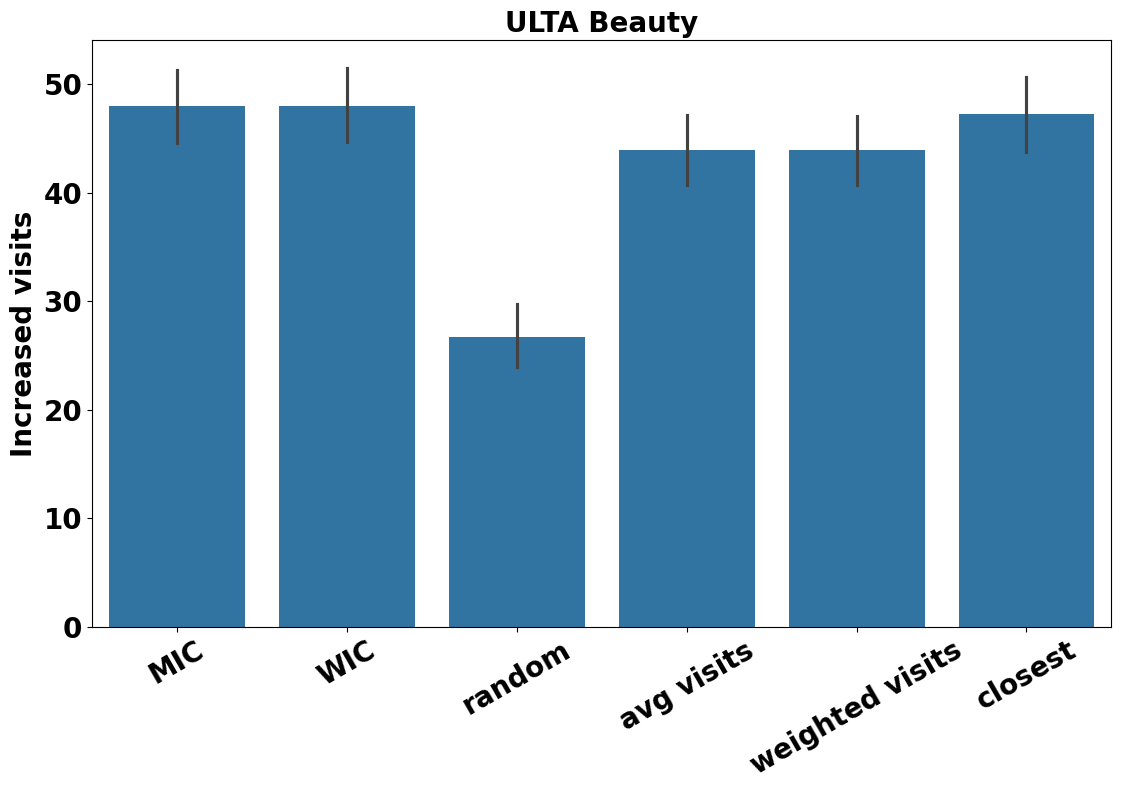

In [ ]:
cnt = 0 
DAY = 30 
plt.figure(figsize = (32, 8))

data = exmple_1_web_design
data_sub = data.melt(value_vars = data.columns[:-1])
data_sub['value'] = data_sub['value'].astype('float')

plt.subplot(131 + cnt)
cnt += 1    
data_sub['Increased visits'] = DAY * data_sub['value']
sns.barplot(data = data_sub, x = 'variable', y = 'Increased visits')
plt.ylabel('Increased visits', fontsize = 20, fontweight = 'bold')
plt.title('{}'.format(brand), fontsize = 20, fontweight = 'bold')
plt.xticks(range(6), ['MIC', 'WIC', 'random', 'avg visits', 'weighted visits', 'closest'], fontsize = 20, rotation = 30, fontweight = 'bold')
plt.xlabel('')
plt.yticks(fontsize = 20, fontweight = 'bold')

plt.tight_layout()


### Example 2 Choose Partner

In [35]:
visits_rage = [0.0203, 0.0603]#[0.1, 0.2]
k = 1


top_selected_w = neib_centrality.sort_values('weighted_influence', ascending =False)[:k]['Neib_Brand'].values
top_selected = neib_centrality.sort_values('influence', ascending =False)[:k]['Neib_Brand'].values
most_avg_visits = ranked_dic.sort_values('avg_visits', ascending =False).index[:k].values
closest_distance = ranked_dic.sort_values('distance', ascending = True).index[:k].values
closest_weighted = ranked_dic.sort_values('weighted_visits', ascending =False).index[:k].values


example_2_partner_choice = []
for rand in range(100):
    current_visits_rate = random.uniform(visits_rage[0], visits_rage[1]) 
    top_cent_visits = compute_visits(top_selected, current_visits_rate)
    top_w_cent_visits = compute_visits(top_selected_w, current_visits_rate)
    random_selected = random.choices(visits_all_business_pure.Neib_Brand.unique(), k = k)
    random_visits = compute_visits(random_selected, current_visits_rate)
    most_avg_visits_inf = compute_visits(most_avg_visits, current_visits_rate)
    closest_distance_inf = compute_visits(closest_distance, current_visits_rate)
    closest_weighted_inf =compute_visits(closest_weighted, current_visits_rate)
    example_2_partner_choice.append([top_cent_visits, top_w_cent_visits, random_visits, most_avg_visits_inf, closest_weighted_inf, closest_distance_inf])


example_2_partner_choice = pd.DataFrame(example_2_partner_choice, columns = ['top_cent_visits', 'top_w_cent_visits', 'random_visits', 'most_avg_visits_inf', 'closest_weighted_inf', "closest_distance_inf"])
example_2_partner_choice.mean()
example_2_partner_choice['type'] = 'example_2_partner_choice'
example_2_partner_choice

,top_cent_visits,top_w_cent_visits,random_visits,most_avg_visits_inf,closest_weighted_inf,closest_distance_inf,type
0,0.130248,0.443812,-0.031385,0.115214,0.115214,0.320449,example_2_partner_choice
1,0.296389,1.009925,-0.071419,0.262178,0.262178,0.729204,example_2_partner_choice
2,0.136556,0.465304,0.335967,0.120793,0.120793,0.335967,example_2_partner_choice
3,0.159810,0.544542,0.019460,0.141364,0.141364,0.393180,example_2_partner_choice
4,0.145986,0.497436,0.025197,0.129135,0.129135,0.359167,example_2_partner_choice
...,...,...,...,...,...,...,...
95,0.220763,0.752234,0.220763,0.195281,0.195281,0.543142,example_2_partner_choice
96,0.200743,0.684019,0.058265,0.177572,0.177572,0.493888,example_2_partner_choice
97,0.141317,0.481527,0.347681,0.125005,0.125005,0.347681,example_2_partner_choice
98,0.203292,0.692703,0.692703,0.179826,0.179826,0.500158,example_2_partner_choice


                         value
variable                      
closest_distance_inf  0.384969
closest_weighted_inf  2.852065
most_avg_visits_inf   2.852065
random_visits         1.606967
top_cent_visits       2.407430
top_w_cent_visits     0.000000


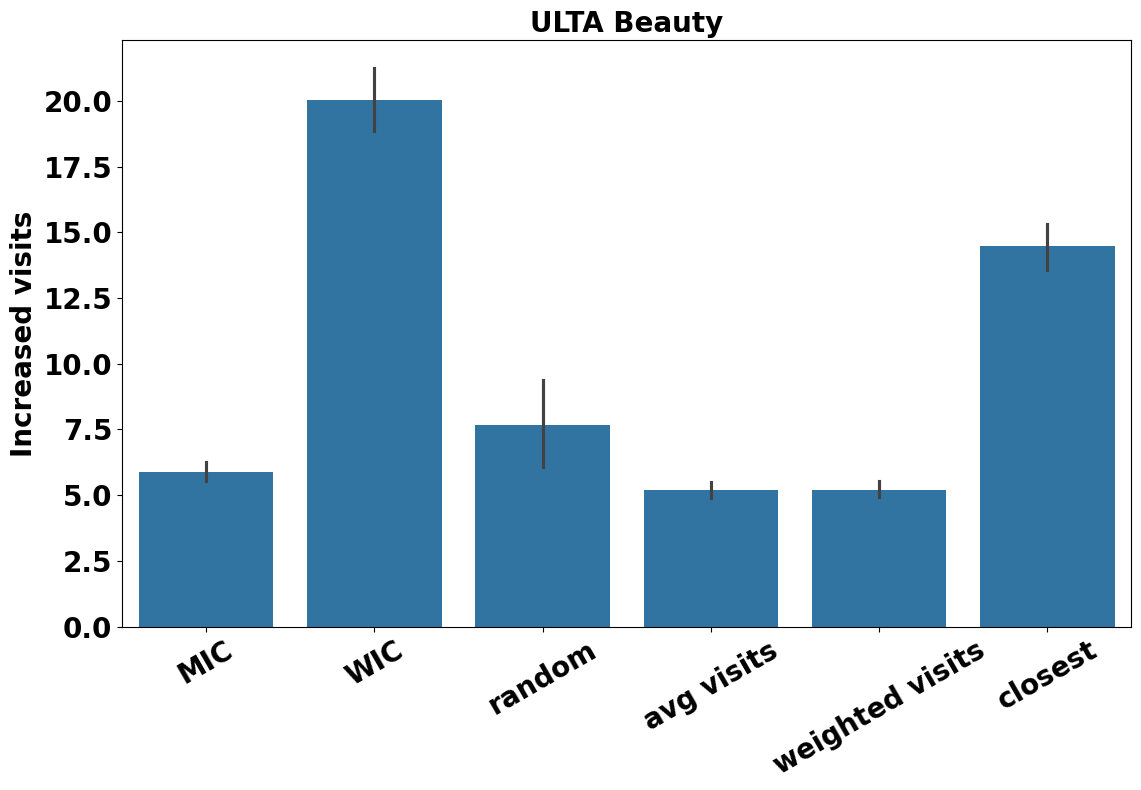

In [ ]:
cnt = 0 
DAY = 30 
plt.figure(figsize = (32, 8))

data = example_2_partner_choice
data_sub = data.melt(value_vars = data.columns[:-1])
data_sub['value'] = data_sub['value'].astype('float')

plt.subplot(131 + cnt)
cnt += 1
data_sub['Increased visits'] = DAY * data_sub['value']#%/ 3200 * 100
sns.barplot(data = data_sub, x = 'variable', y = 'Increased visits')
plt.ylabel('Increased visits', fontsize = 20, fontweight = 'bold')
plt.title('{}'.format(brand), fontsize = 20, fontweight = 'bold')
plt.xticks(range(6), ['MIC', 'WIC', 'random', 'avg visits', 'weighted visits', 'closest'], fontsize = 20, rotation = 30, fontweight = 'bold')
plt.xlabel('')
plt.yticks(fontsize = 20, fontweight = 'bold')

plt.tight_layout()

### Example 4 Inbound Centrality Budget Allocations

In [41]:
visits_rage = [0.0203, 0.0603] 
k = 5
example_4_budget_allocation = []
avg_visits = visits_all_business_pure.sort_values('Neib_avg_visits', ascending = False)[:k]
weighted_visits = visits_all_business_pure.sort_values('weighted_visits', ascending = False)[:k]
closest = visits_all_business_pure.sort_values('Time_mins_inv', ascending = True)[:k]

for rand in range(100):
    current_visits_rate = random.uniform(visits_rage[0], visits_rage[1]) 
    estimate_based =  visits_all_business_pure['num_inf_visits'][:k].sum() * current_visits_rate  #(df['num_inf_visits'][:k].sum() * current_visits_rate * consumer_spending - k * budget ) / k * budget  * 100 
    random_based = np.sum(random.choices(visits_all_business_pure['num_inf_visits'].values, k = k)) * current_visits_rate #(np.sum(random.choices(df['num_inf_visits'].values, k = k)) * current_visits_rate * consumer_spending - k * budget ) / k * budget  * 100 
    avg_visits_profit = np.sum(avg_visits['num_inf_visits']) * current_visits_rate #(avg_visits['num_inf_visits'].sum() * current_visits_rate * consumer_spending - k * budget ) / k * budget  * 100 
    weighted_visits_profit = np.sum(weighted_visits['num_inf_visits'])  * current_visits_rate #(weighted_visits['num_inf_visits'].sum() * current_visits_rate * consumer_spending - k * budget ) / k * budget  * 100 
    closest_profit = np.sum(closest['num_inf_visits']) * current_visits_rate  #(closest['num_inf_visits'].sum() * current_visits_rate * consumer_spending - k * budget ) / k * budget  * 100 
    example_4_budget_allocation.append([estimate_based, random_based, avg_visits_profit, weighted_visits_profit, closest_profit])


example_4_budget_allocation = pd.DataFrame(example_4_budget_allocation, columns = ['top', 'random', 'avg_visits_profit', 'weighted_visits_profit', 'closest_profit'])
example_4_budget_allocation['type'] = 'example_4_budget_allocation'
example_4_budget_allocation

,top,random,avg_visits_profit,weighted_visits_profit,closest_profit,type
0,2.017300,0.454473,0.172545,1.363352,0.006099,example_4_budget_allocation
1,1.168096,0.003171,0.099910,0.789435,0.003532,example_4_budget_allocation
2,1.489294,0.127390,0.127383,1.006510,0.004503,example_4_budget_allocation
3,0.832100,0.398453,0.071172,0.562358,0.002516,example_4_budget_allocation
4,1.142001,0.326933,0.097678,0.771799,0.003453,example_4_budget_allocation
...,...,...,...,...,...,...
95,1.146433,0.220468,0.098057,0.774794,0.003466,example_4_budget_allocation
96,0.946028,-0.003947,0.080916,0.639354,0.002860,example_4_budget_allocation
97,1.366551,0.065890,0.116885,0.923556,0.004132,example_4_budget_allocation
98,0.945566,0.030068,0.080877,0.639042,0.002859,example_4_budget_allocation


                             value
variable                          
avg_visits_profit        10.691455
closest_profit          329.741779
random                    6.823982
top                       0.000000
weighted_visits_profit    0.479662


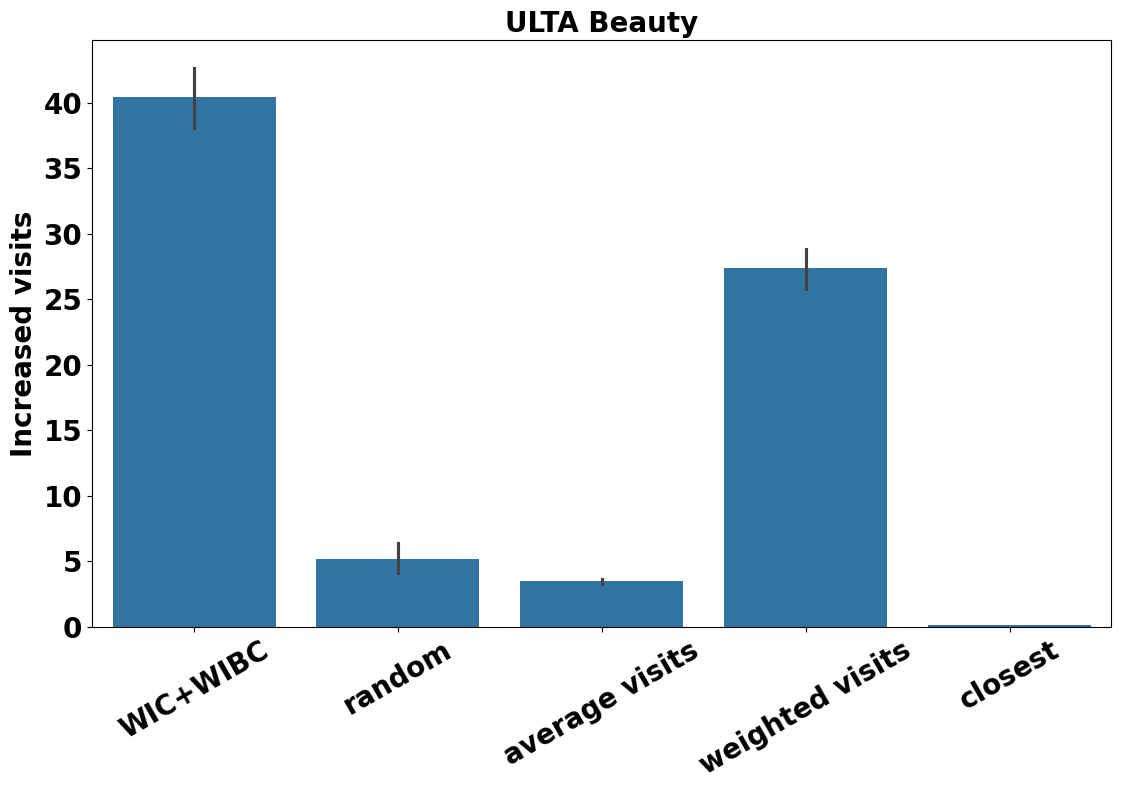

In [ ]:
cnt = 0 
plt.figure(figsize = (32, 8))
data = example_4_budget_allocation      
data_sub = data.melt(value_vars = data.columns[:-1])    

plt.subplot(131 + cnt)
cnt += 1 
data_sub['Revenue'] = DAY * data_sub['value']
sns.barplot(data = data_sub, x = 'variable', y = 'Revenue')
plt.title('{}'.format(brand), fontsize = 20, fontweight = 'bold')
plt.xticks(range(5), [ 'WIC+WIBC', 'random', 'average visits', 'weighted visits', 'closest'], fontsize = 20, fontweight = 'bold', rotation = 30)
plt.xlabel('')
plt.yticks(fontsize = 20, fontweight = 'bold')
plt.ylabel('Increased visits', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

### Example 3: Inbound Centrality for Local Marketing Partnerships

In [57]:
focal_store_chosen_num = 1
#%%
# https://coresight.com/research/going-head-to-head-in-beauty-retailing-a-comparison-of-sephora-and-ulta/
ranked_dic = visits_all_business_pure.groupby('Focal_Stores').agg(num_neighbors=('Neib_Stores', 'count'),
                                                   focal_avg_visits=('Foc_avg_visits', 'mean'),
                                                   neighbor_avg_visits=('Neib_avg_visits', 'sum'),
                                                   weighted_visits = ('weighted_visits', 'sum')
                                                )

#%%

top_selected_w = inner_centrality.sort_values('weighted_influence', ascending =False)[:focal_store_chosen_num].Focal_Stores.values
top_selected = inner_centrality.sort_values('influence', ascending =False)[:focal_store_chosen_num].Focal_Stores.values
num_stores = ranked_dic.sort_values('num_neighbors', ascending =False).index[:focal_store_chosen_num]
focal_avg_visits = ranked_dic.sort_values('focal_avg_visits', ascending =False).index[:focal_store_chosen_num]
avg_visits = ranked_dic.sort_values('neighbor_avg_visits', ascending =False).index[:focal_store_chosen_num]
weighted_visits = ranked_dic.sort_values('weighted_visits', ascending =False).index[:focal_store_chosen_num]


def compute_visits_eg3(store_id, current_visits_rate, num_neighboring_store = 3):
    sub_g = visits_all_business_pure[visits_all_business_pure.Focal_Stores.isin(store_id)]
    #sub_g = sub_g.sort_values('weighted_visits', ascending = False).reset_index()#[:num_neighboring_store]
    visits = 0 
    for i in range(sub_g.shape[0]):
        visits += sub_g['num_inf_visits'].values[i] 
    return visits * current_visits_rate


### a single collaborator store 
example_3_local_partner_choice = []
for rand in range(100):
    current_visits_rate = random.uniform(visits_rage[0], visits_rage[1]) 
    random_selected = random.choice(ranked_dic.index)
    rand_profit = compute_visits_eg3([random_selected], current_visits_rate)
    top_selected_w_profit = compute_visits_eg3(top_selected_w, current_visits_rate)
    top_selected_profit = compute_visits_eg3(top_selected, current_visits_rate)
    num_stores_profit = compute_visits_eg3(num_stores, current_visits_rate)
    focal_avg_visits_profit = compute_visits_eg3(focal_avg_visits, current_visits_rate)
    avg_visits_prift = compute_visits_eg3(avg_visits, current_visits_rate)
    closest_weighted_profit = compute_visits_eg3(weighted_visits, current_visits_rate)
    example_3_local_partner_choice.append([rand_profit, top_selected_profit, top_selected_w_profit,  num_stores_profit, focal_avg_visits_profit, avg_visits_prift, closest_weighted_profit])


example_3_local_partner_choice = pd.DataFrame( example_3_local_partner_choice , columns =['rand_profit', 'top_selected_profit', 'top_selected_w_profit', 'num_stores_profit', 'focal_avg_visits_profit', "avg_visits_prift", "closest_weighted_profit"])
example_3_local_partner_choice['type'] = 'example_3_local_partner_choice'

example_3_local_partner_choice

,rand_profit,top_selected_profit,top_selected_w_profit,num_stores_profit,focal_avg_visits_profit,avg_visits_prift,closest_weighted_profit,type
0,0.019822,0.101547,1.144481,0.025861,1.144481,0.143531,0.143531,example_3_local_partner_choice
1,0.132476,0.059612,0.671856,0.015182,0.671856,0.084258,0.084258,example_3_local_partner_choice
2,0.109414,0.079020,0.890594,0.020124,0.890594,0.111691,0.111691,example_3_local_partner_choice
3,0.725468,0.064369,0.725468,0.016393,0.725468,0.090982,0.090982,example_3_local_partner_choice
4,0.198359,0.140337,1.581669,0.035740,1.581669,0.198359,0.198359,example_3_local_partner_choice
...,...,...,...,...,...,...,...,...
95,0.239339,0.112718,1.270391,0.028706,1.270391,0.159321,0.159321,example_3_local_partner_choice
96,0.027067,0.047712,0.537739,0.012151,0.537739,0.067439,0.067439,example_3_local_partner_choice
97,0.013464,0.076446,0.861584,0.019469,0.861584,0.108052,0.108052,example_3_local_partner_choice
98,0.205507,0.096785,1.090814,0.024649,1.090814,0.136800,0.136800,example_3_local_partner_choice


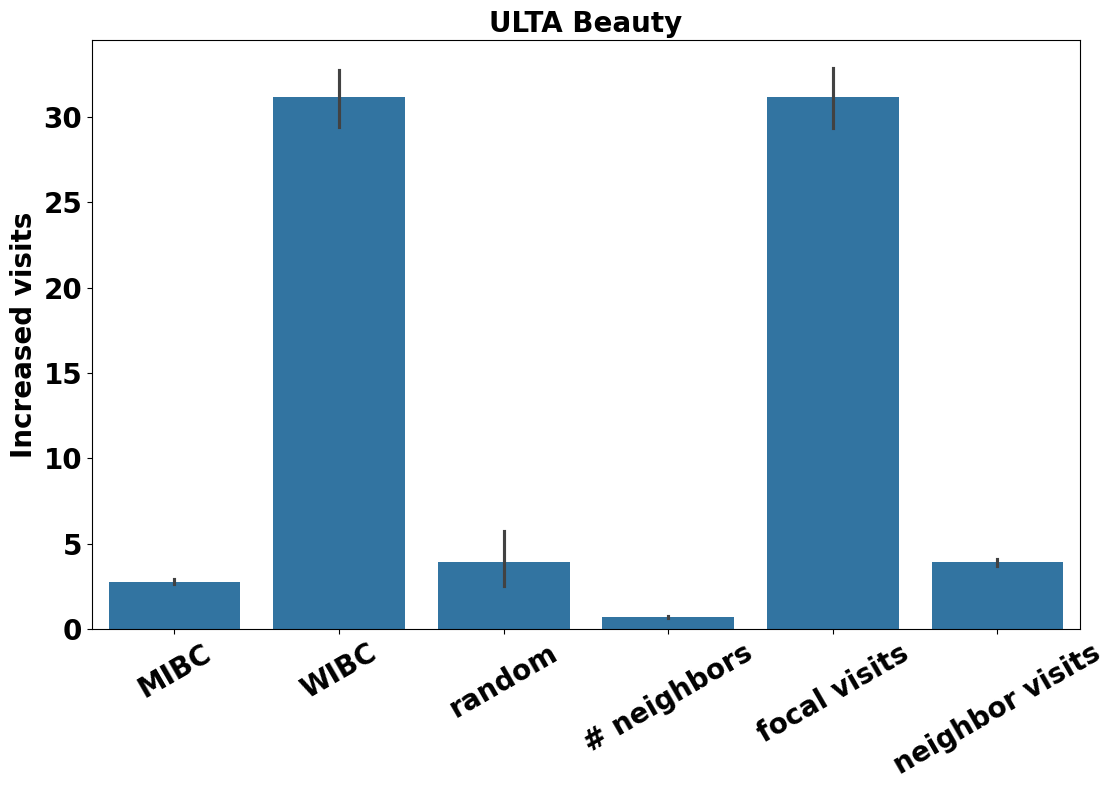

In [67]:
cnt = 0 
plt.figure(figsize = (32, 8))
data = example_3_local_partner_choice
data_sub = data.melt(value_vars = data.columns[:-1])
plt.subplot(131 + cnt)
cnt += 1 
data_sub['Revenue'] = DAY * (data_sub['value']) #/ 4000 * 100

order = ['top_selected_profit', 'top_selected_w_profit', 'rand_profit', 'num_stores_profit', 
            'focal_avg_visits_profit',  'closest_weighted_profit']
sns.barplot(data = data_sub, x = 'variable', y = 'Revenue', order=order)
plt.title('{}'.format(brand), fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Increased visits', fontsize = 20, fontweight = 'bold')
plt.xticks(range(6), [ 'MIBC', 'WIBC', 'random', '# neighbors', 'focal visits', 'neighbor visits'], fontsize = 20, fontweight = 'bold', rotation = 30)
#plt.suptitle('Local marketing partnership for five neighbors of a chosen focal store', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

### Making the Figure D1 and D2

1. Then we need to plot their X_Estimate for each of the four models
2. Then we need to put stars at the neighboring brands as per the p-value for each model \
-> *** means p_value <= 0.01 \
-> ** means 0.01 < p_value <= 0.05 \
-> * means 0.05 < p_value <= 0.1

In [ ]:
def get_pvalue_stars(p_value):
    if p_value <= 0.01:
        return '***'
    elif 0.01 < p_value <= 0.05:
        return '**'
    elif 0.05 < p_value <= 0.1:
        return '*'
    else:
        return ''

In [ ]:
coeff_est_df = result_df[result_df['filename'].isin(significant_brands_list)]
coeff_est_df['X_pvalue_stars'] = coeff_est_df['X_Pr(>|t|)'].apply(get_pvalue_stars)
coeff_est_df

In [ ]:
lin_reviews = coeff_est_df[coeff_est_df['type'] == 'fe_reviews_reviews'].sort_values('X_Estimate', ascending=False)
lin_visits = coeff_est_df[coeff_est_df['type'] == 'fe_reviews_visits'].sort_values('X_Estimate', ascending=False)
exp_reviews = coeff_est_df[coeff_est_df['type'] == 'fe_exp_reviews_reviews'].sort_values('X_Estimate', ascending=False)
exp_visits = coeff_est_df[coeff_est_df['type'] == 'fe_exp_reviews_visits'].sort_values('X_Estimate', ascending=False)

In [ ]:
def prepare_first_stage_results_review(row):
    # Twitter Vaues
    tw_estimate = format(float(row['IV_firststage_reviews_tw_Estimate']), '.2e')
    tw_std_err = format(float(row['IV_firststage_reviews_tw_Std. Error']), '.2e')
    tw_p_value = float(row['IV_firststage_reviews_tw_Pr(>|t|)'])
    
    # Facebook Vaues
    fb_estimate = format(float(row['IV_firststage_reviews_fb_Estimate']), '.2e')
    fb_std_err = format(float(row['IV_firststage_reviews_fb_Std. Error']), '.2e')
    fb_p_value = float(row['IV_firststage_reviews_fb_Pr(>|t|)'])
    
    # Instagram Vaues
    ig_estimate = format(float(row['IV_firststage_reviews_ig_Estimate']), '.2e')
    ig_std_err = format(float(row['IV_firststage_reviews_ig_Std. Error']), '.2e')
    ig_p_value = float(row['IV_firststage_reviews_ig_Pr(>|t|)'])
    
    # Getting table entries
    twitter_likes = str(tw_estimate) + get_pvalue_stars(tw_p_value) + "({})".format(tw_std_err)
    facebook_likes = str(fb_estimate) + get_pvalue_stars(fb_p_value) + "({})".format(fb_std_err)
    instagram_likes = str(ig_estimate) + get_pvalue_stars(ig_p_value) + "({})".format(ig_std_err)
    
    # Calculating significant variables
    num_sig = 0
    
    if (tw_p_value <= 0.05):
        num_sig += 1

    if (fb_p_value <= 0.05):
        num_sig += 1

    if (ig_p_value <= 0.05):
        num_sig += 1
    
    # Getting WaldTest F-Stats
    wald_f_stat = row['WaldTest_F']
        
    return pd.Series([twitter_likes, facebook_likes, instagram_likes, num_sig, wald_f_stat],
                     index=['Twitter Likes', 'Facebook Likes', 'Instagram Likes', 'Num Sig', 'Weka Instrument (F-stats)'])

In [ ]:
def prepare_first_stage_results_visits(row):
    # Visits Vaues
    visits_estimate = format(float(row['IV_firststage_visits_Estimate']), '.2e')
    visits_std_err = format(float(row['IV_firststage_visits_Std. Error']), '.2e')
    visits_p_value = float(row['IV_firststage_visits_Pr(>|t|)'])
        
    # Getting table entries
    visits = str(visits_estimate) + get_pvalue_stars(visits_p_value) + "({})".format(visits_std_err)
        
    # Getting WaldTest F-Stats
    wald_f_stat = row['WaldTest_F']
        
    return pd.Series([visits, wald_f_stat],
                     index=['Visits', 'Weka Instrument (F-stats)'])

In [ ]:
first_stage_linear_reviews = lin_reviews.apply(prepare_first_stage_results_review, axis=1, result_type='expand').reset_index(drop=True)
first_stage_linear_reviews

In [ ]:
first_stage_linear_visits = lin_visits.apply(prepare_first_stage_results_visits, axis=1, result_type='expand').reset_index(drop=True)
first_stage_linear_visits

In [ ]:
first_stage_exp_reviews = exp_reviews.apply(prepare_first_stage_results_review, axis=1, result_type='expand').reset_index(drop=True)
first_stage_exp_reviews

In [ ]:
first_stage_exp_visits = exp_visits.apply(prepare_first_stage_results_visits, axis=1, result_type='expand').reset_index(drop=True)
first_stage_exp_visits

In [ ]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
lin_reviews['Lower Bound'] = lin_reviews['X_Estimate'] - 1.96 * lin_reviews['X_Std. Error']
lin_reviews['Upper Bound'] = lin_reviews['X_Estimate'] + 1.96 * lin_reviews['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in lin_reviews.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['X_pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Linear Reviews')
ax.set_xscale('symlog')

# Show the plot
plt.show()

In [ ]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
lin_visits['Lower Bound'] = lin_visits['X_Estimate'] - 1.96 * lin_visits['X_Std. Error']
lin_visits['Upper Bound'] = lin_visits['X_Estimate'] + 1.96 * lin_visits['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in lin_visits.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['X_pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Linear Visits')
ax.set_xscale('symlog')
ax.set_xlim()

# Show the plot
plt.show()

In [ ]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
exp_reviews['Lower Bound'] = exp_reviews['X_Estimate'] - 1.96 * exp_reviews['X_Std. Error']
exp_reviews['Upper Bound'] = exp_reviews['X_Estimate'] + 1.96 * exp_reviews['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in exp_reviews.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['X_pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Exponential Reviews')
ax.set_xscale('symlog')

# Show the plot
plt.show()

In [ ]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
exp_visits['Lower Bound'] = exp_visits['X_Estimate'] - 1.96 * exp_visits['X_Std. Error']
exp_visits['Upper Bound'] = exp_visits['X_Estimate'] + 1.96 * exp_visits['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in exp_visits.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['X_pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Exponential Visits')
ax.set_xscale('symlog')

# Show the plot
plt.show()